<a href="https://colab.research.google.com/github/ImHumbert/NST/blob/master/yapaque2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('train.csv', index_col = 0, parse_dates = True)
#df = pd.read_csv('train.csv')
df.head()  #variables con las que se piden abrir el dataset , index_col = 0, parse_dates = True

,MES,TEMP_MAX,TEMP_MIN,TEMP_MED,PRES_MED,PRES_MAX,PRES_MIN,HUM_MED,HUM_MAX,HUM_MIN
DATE,,,,,,,,,,
2015-12-08,DICIEMBRE,27.8,23.3,25.55,30.5,34.3,28.0,96.0,98.0,92.0
2015-12-09,DICIEMBRE,30.2,21.6,25.90,28.7,33.2,24.7,91.0,98.0,82.0
2015-12-10,DICIEMBRE,30.9,15.4,23.15,27.3,37.4,17.9,93.0,100.0,82.0
2015-12-11,DICIEMBRE,27.2,20.2,23.70,26.8,32.6,22.6,95.0,99.0,91.0
2015-12-12,DICIEMBRE,32.4,20.0,26.20,30.0,38.1,22.8,93.0,100.0,76.0


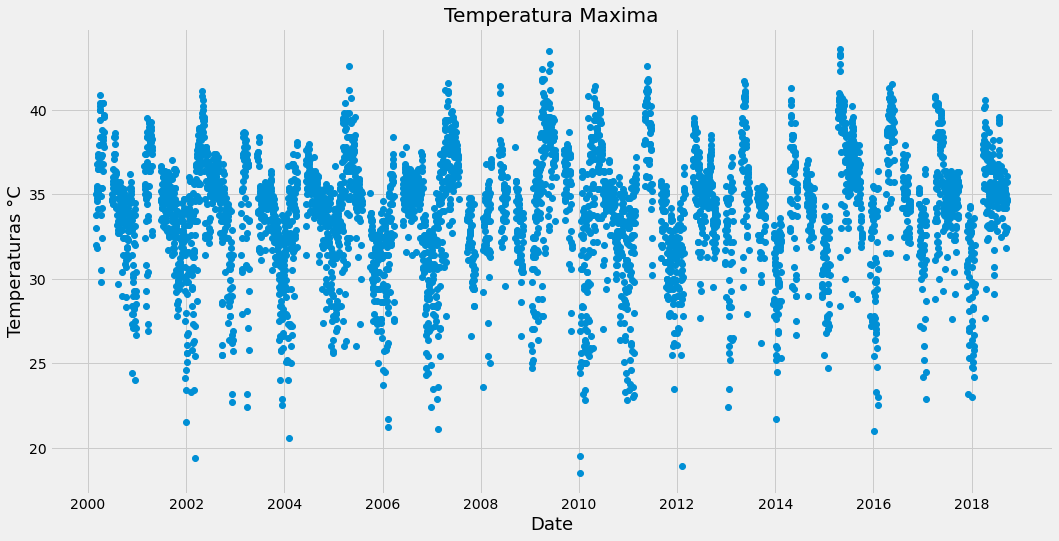

In [ ]:
plt.figure(figsize = (16,8))
plt.title("Temperatura Maxima")
plt.plot(df['TEMP_MAX'],'o')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Temperaturas °C', fontsize = 18)
plt.show()

In [ ]:
data = df.filter(['TEMP_MAX'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*1)
print(dataset)

[[27.8]
 [30.2]
 [30.9]
 ...
 [36.5]
 [35.9]
 [36.4]]


In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.37051793],
       [0.46613546],
       [0.4940239 ],
       ...,
       [0.71713147],
       [0.69322709],
       [0.71314741]])

In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(59, len(train_data)):
    x_train.append(train_data[i-59:i,0])
    y_train.append(train_data[i,0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.37051793, 0.46613546, 0.4940239 , 0.34661355, 0.55378486,
       0.56972112, 0.55776892, 0.61752988, 0.63346614, 0.63346614,
       0.60557769, 0.35856574, 0.35856574, 0.49003984, 0.57768924,
       0.57370518, 0.64940239, 0.63346614, 0.64541833, 0.59760956,
       0.62549801, 0.67729084, 0.62151394, 0.6374502 , 0.60159363,
       0.56972112, 0.37051793, 0.09960159, 0.42629482, 0.60159363,
       0.58565737, 0.67330677, 0.2749004 , 0.4063745 , 0.41832669,
       0.36653386, 0.4501992 , 0.5059761 , 0.61752988, 0.31474104,
       0.35059761, 0.33864542, 0.45816733, 0.4501992 , 0.33067729,
       0.19123506, 0.33067729, 0.49800797, 0.54581673, 0.60557769,
       0.29482072, 0.25099602, 0.43426295, 0.61752988, 0.66932271,
       0.67330677, 0.71314741, 0.48207171, 0.15936255])]
[0.17928286852589637]

[array([0.37051793, 0.46613546, 0.4940239 , 0.34661355, 0.55378486,
       0.56972112, 0.55776892, 0.61752988, 0.63346614, 0.63346614,
       0.60557769, 0.35856574, 0.35856574, 0.49

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape
#y_train.shape

(4741, 59, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 1, epochs = 5)

Epoch 1/5
4741/4741 [==============================] - 172s 36ms/step - loss: 0.0103 - accuracy: 4.2185e-04
Epoch 2/5
4741/4741 [==============================] - 171s 36ms/step - loss: 0.0084 - accuracy: 4.2185e-04
Epoch 3/5
4741/4741 [==============================] - 169s 36ms/step - loss: 0.0083 - accuracy: 4.2185e-04
Epoch 4/5
4741/4741 [==============================] - 169s 36ms/step - loss: 0.0081 - accuracy: 4.2185e-04
Epoch 5/5
4741/4741 [==============================] - 168s 35ms/step - loss: 0.0080 - accuracy: 4.2185e-04


In [ ]:
dfv = pd.read_csv('validation.csv', index_col = 0, parse_dates = True)
#dfv = pd.read_csv('validation.csv')
dfv.head()

,MES,TEMP_MAX,TEMP_MIN,TEMP_MED,PRES_MED,PRES_MAX,PRES_MIN,HUM_MED,HUM_MAX,HUM_MIN
DATE,,,,,,,,,,
2000-01-01,ENERO,29.9,19.2,24.55,23.1,25.3,18.5,80.0,96.0,55.0
2000-01-02,ENERO,31.6,21.0,26.30,24.9,27.6,23.2,78.0,93.0,53.0
2000-01-03,ENERO,31.2,20.0,25.60,25.0,29.3,23.3,83.0,99.0,54.0
2000-01-04,ENERO,30.8,18.8,24.80,24.5,27.1,22.8,87.0,99.0,55.0
2000-01-05,ENERO,23.8,18.8,21.30,21.3,23.2,19.2,87.0,96.0,72.0


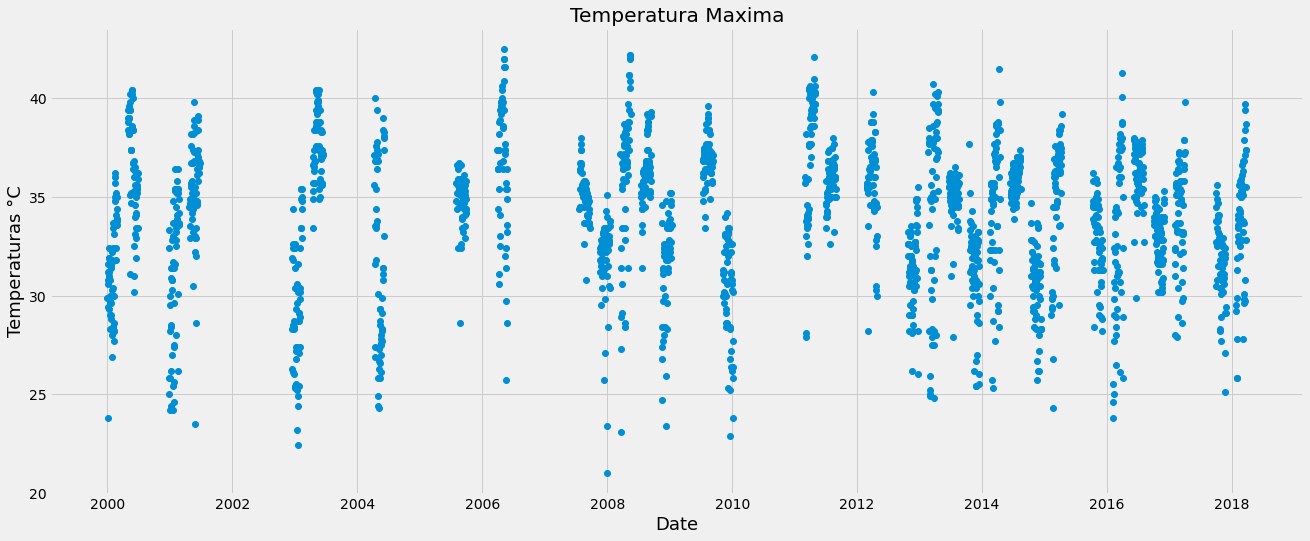

In [ ]:
plt.figure(figsize = (20,8))
plt.title("Temperatura Maxima")
plt.plot(dfv['TEMP_MAX'],'o')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Temperaturas °C', fontsize = 18)
plt.show()

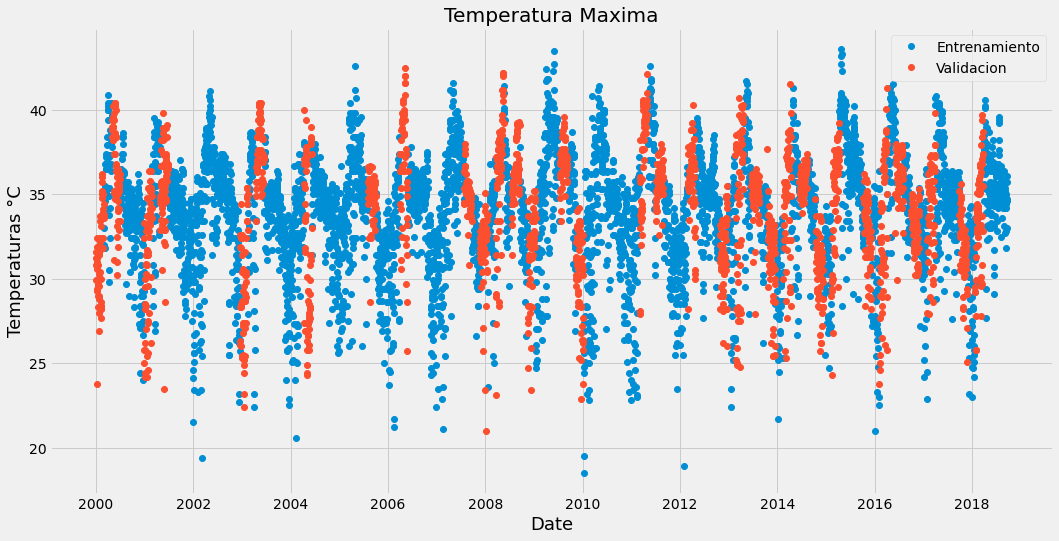

In [ ]:
plt.figure(figsize = (16,8))
plt.title("Temperatura Maxima")
plt.plot(df['TEMP_MAX'],'o')
plt.plot(dfv['TEMP_MAX'],'o')
plt.legend(['Entrenamiento', 'Validacion'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Temperaturas °C', fontsize = 18)
plt.show()

In [ ]:
dfn = pd.read_csv('temperaturas41.csv', index_col = 0, parse_dates = True)
dfn.head()

,MES,TEMP_MAX,TEMP_MIN,TEMP_MED,PRES_MED,PRES_MAX,PRES_MIN,HUM_MED,HUM_MAX,HUM_MIN
DATE,,,,,,,,,,
2000-01-01,ENERO,29.9,19.2,24.55,23.1,25.3,18.5,80.0,96.0,55.0
2000-01-02,ENERO,31.6,21.0,26.30,24.9,27.6,23.2,78.0,93.0,53.0
2000-01-03,ENERO,31.2,20.0,25.60,25.0,29.3,23.3,83.0,99.0,54.0
2000-01-04,ENERO,30.8,18.8,24.80,24.5,27.1,22.8,87.0,99.0,55.0
2000-01-05,ENERO,23.8,18.8,21.30,21.3,23.2,19.2,87.0,96.0,72.0


In [ ]:
#PRIMERA FORMA DE ESCALAR TODO UN DATASET
yq = dfn.filter(['TEMP_MAX'])
validacion = yq['2000-01-01':].values
print(len(validacion))

last = scaler.transform(validacion)

X_test = []
for i in range(59,len(last)):
    X_test.append(last[i-59:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

6847


In [ ]:
#SEGUNDA FORMA DE ESCALAR UN DATASET
validacion = dfn['2000-01-01':].iloc[:,1:2]

x_test = validacion.values
x_test = scaler.transform(x_test)

X_test = []
for i in range(60,len(x_test)):
    X_test.append(x_test[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
#Tercera forma de normalizar un dataset
yq = dfn.filter(['TEMP_MAX'])
conio = yq.values
scaled_data = scaler.fit_transform(conio)

validation_data_len = math.ceil(len(conio)*.9)

test_data = scaled_data[validation_data_len-60:,:]

x_test = []
y_test = conio[validation_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [ ]:
#Pronosticamos
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
print(len(predictions))

6788


In [ ]:
#Se crea una tabla con las predicciones
valid = yq['2000-02-29':]
valid['Prediccion'] = predictions
valid

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TEMP_MAX,Prediccion
DATE,,
2000-02-29,34.4,32.786942
2000-03-01,35.0,33.379101
2000-03-02,33.0,33.712650
2000-03-03,32.0,32.133137
2000-03-04,33.8,31.746988
...,...,...
2018-09-25,35.2,32.975803
2018-09-26,35.7,34.105133
2018-09-27,34.5,34.240505


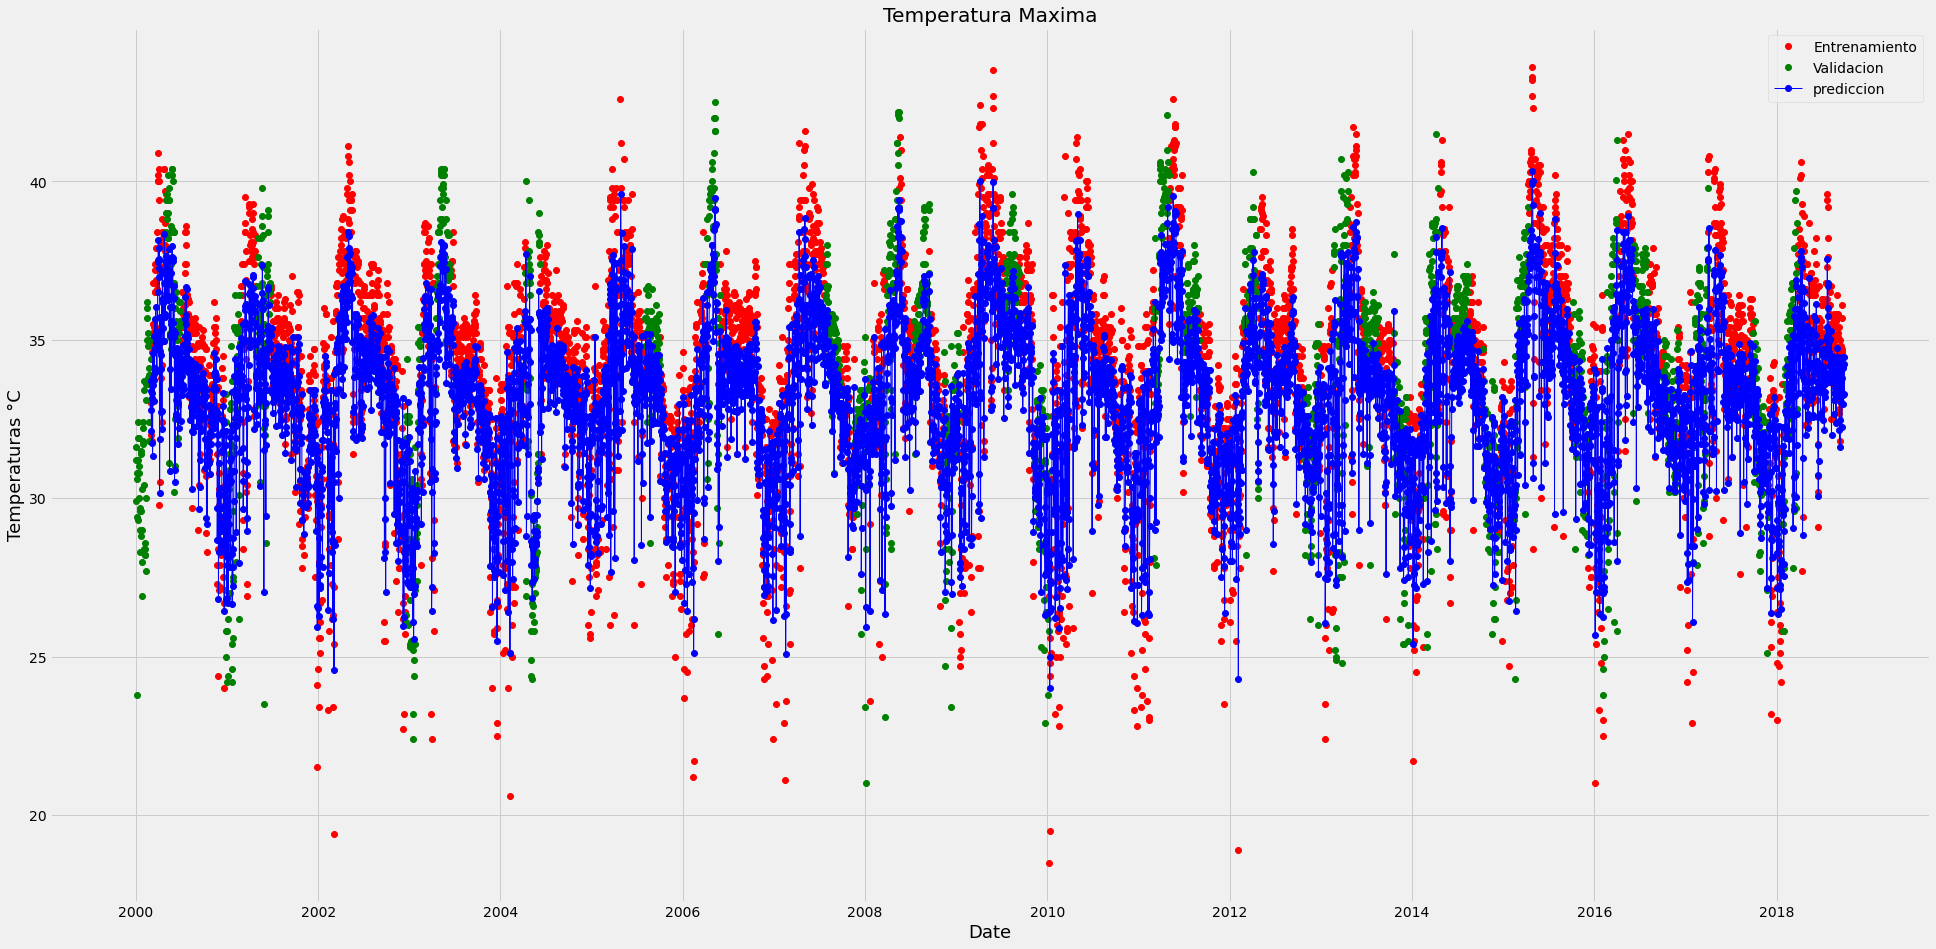

In [ ]:
#Graficar los resultados
plt.figure(figsize= (30,15))
plt.title("Temperatura Maxima")
plt.plot(df['TEMP_MAX'],'o', color = 'red', label = 'Entrenamiento')
plt.plot(dfv['TEMP_MAX'],'o', color = 'green', label = 'Validacion')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Temperaturas °C', fontsize = 18)
plt.plot(valid['Prediccion'],'-ok',color = 'blue',linewidth=1)
plt.legend(['Entrenamiento','Validacion', 'prediccion'])
plt.savefig('ejemplo1.png')
plt.show()

In [ ]:
#Si solo deseo pronosticar un dia
ndf1 = dfv[:'2000-03-01'].iloc[:,1:2]

lastdays = ndf1[-59:].values

lastdayscaled = scaler.transform(lastdays)

Xtest = []

Xtest.append(lastdayscaled)

Xtest = np.array(Xtest)

Xtest = np.reshape(Xtest,(Xtest.shape[0],Xtest.shape[1],1))

pred = model.predict(Xtest)

pred = scaler.inverse_transform(pred)
print(pred)

[[34.923203]]


Aqui empieza los bloques de prueba

In [ ]:
rmse = np.sqrt(np.mean(predictions -y_test)**2)
rmse

0.26663805875924496

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


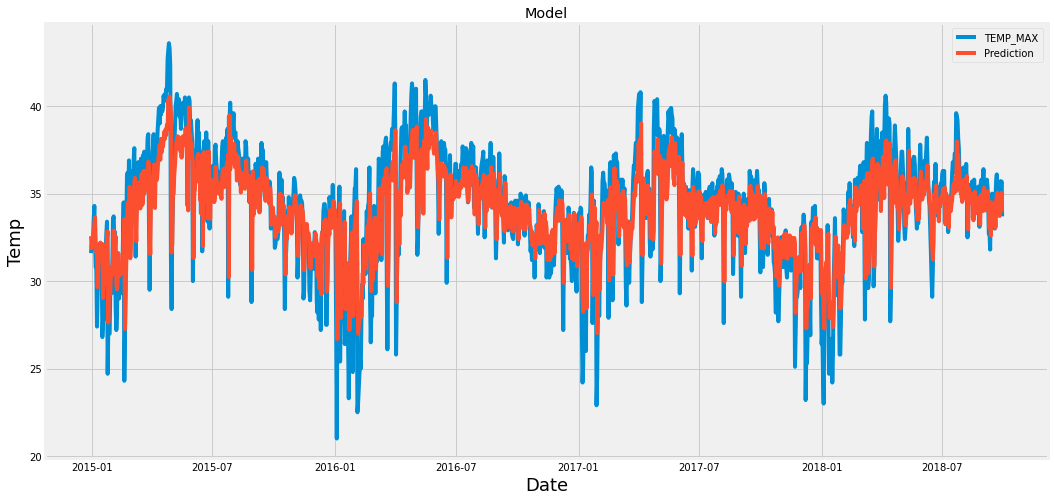

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = predictions

plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Temp', fontsize = 18)
#plt.plot(train['TEMP_MAX'])
plt.plot(valid[['TEMP_MAX','Prediction']])
plt.legend(['TEMP_MAX', 'Prediction'])
plt.show()

In [ ]:
valid

,TEMP_MAX,Prediction
DATE,,
2014-12-31,31.6,30.926085
2015-01-01,32.1,30.234810
2015-01-02,32.1,30.765505
2015-01-03,32.4,30.657164
2015-01-04,33.5,30.905571
...,...,...
2018-09-25,35.2,32.390804
2018-09-26,35.7,33.526432
2018-09-27,34.5,33.462589


"""estas instrucciones funcionan unicamente si el dataset se lee sin cubrir los indices"""
#valorx ='2015-12-08'

#if (valorx in df['DATE'].values):
#  print("si")

#else:
#  print("no")


imd = df['DATE'].values
y = []

for i in range(60,len(imd),60):

  y.append(imd[i])

print(y)
print(len(y))

In [ ]:
ndf = df.filter(['TEMP_MAX'])

lastdays = ndf[-60:].values

lastdayscaled = scaler.transform(lastdays)

Xtest = []

Xtest.append(lastdayscaled)

Xtest = np.array(Xtest)

Xtest = np.reshape(Xtest,(Xtest.shape[0],Xtest.shape[1],1))

pred = model.predict(Xtest)

pred = scaler.inverse_transform(pred)
print(pred)

[[32.132454]]


In [ ]:
#Con este bloque se grafican las fechas de validacion y entrenamiento
traind = pd.read_csv('train.csv')
vald = pd.read_csv('validation.csv')

imd = traind['DATE'].values

y = []
for i in range(60,len(imd),60):

  y.append(imd[i])

imd1 = traind['TEMP_MAX'].values

x = []

for z in range(60,len(imd1),60):
  x.append(imd1[z])

imd2 = vald['DATE'].values

a = []

for k in range(60,len(imd2),60):
  a.append(imd2[k])

imd3 = vald['TEMP_MAX'].values

b = []

for n in range(60,len(imd3),60):
  b.append(imd3[n])

valid5 = x
valid6 = y

valid7 = a
valid8 = b

ondf = pd.DataFrame({"DATE": valid7, "TEMPMAX": valid8})#dataframe de validacion

ndf = pd.DataFrame({"DATE": valid6, "TEMPMAX": valid5})#dataframe de entrenamiento

#print(ondf)

#plt.figure(figsize = (20,8))
#x = ondf['DATE']
#y = ondf['TEMPMAX']
#w = ndf['DATE']
#z = ndf['TEMPMAX']
#plt.scatter(w, z)
#plt.xticks(w, rotation='vertical')
#ndf.plot(x = "DATE", y = "TEMPMAX")
ondf.to_csv('val.csv')
ndf.to_csv('entr.csv')

In [ ]:
ndf2 = dfn[:'2018-07-25'].iloc[:,1:2]

lastdays = ndf2[-59:].values

lastdayscaled = scaler.transform(lastdays)

Xtest = []

Xtest.append(lastdayscaled)

Xtest = np.array(Xtest)

Xtest = np.reshape(Xtest,(Xtest.shape[0],Xtest.shape[1],1))

pred = model.predict(Xtest)

pred = scaler.inverse_transform(pred)
print(pred)

[[38.449005]]


In [ ]:
pr = pd.read_csv('pred.csv',index_col = 0, parse_dates = True)
#pr = pd.read_csv('pred.csv')
pr.head()

,TEMPMAX,PRED
DATE,,
2000-03-01,35.0,34.3085
2000-04-30,39.0,37.9658
2000-06-29,34.7,34.6500
2000-08-28,34.1,33.8045
2000-10-27,33.5,33.0916


In [ ]:
et = pd.read_csv('entrenamiento.csv', index_col = 0, parse_dates = True)
et.head()

,TEMPMAX,PRED
DATE,,
2000-03-01,35.0,34.3085
2000-06-29,34.7,34.6500
2000-08-28,34.1,33.8045
2000-10-27,33.5,33.0916
2001-02-24,36.7,35.4805


In [ ]:
vail = pd.read_csv('validacion.csv', index_col = 0, parse_dates = True)
vail.head()

,TEMPMAX,PRED
DATE,,
2000-04-30,39.0,37.9658
2000-12-26,32.4,31.6592
2001-04-25,34.5,34.6117
2002-12-16,28.3,29.0983
2003-04-15,33.4,32.8213


In [ ]:
comparacion = pr['DATE'].values

#rel = [comparacion]
#longitud = len(rel)

for h in comparacion:
  print(h)
  
  if comparacion[h] in :
#    print("yes")

#  else:
#    print("no")

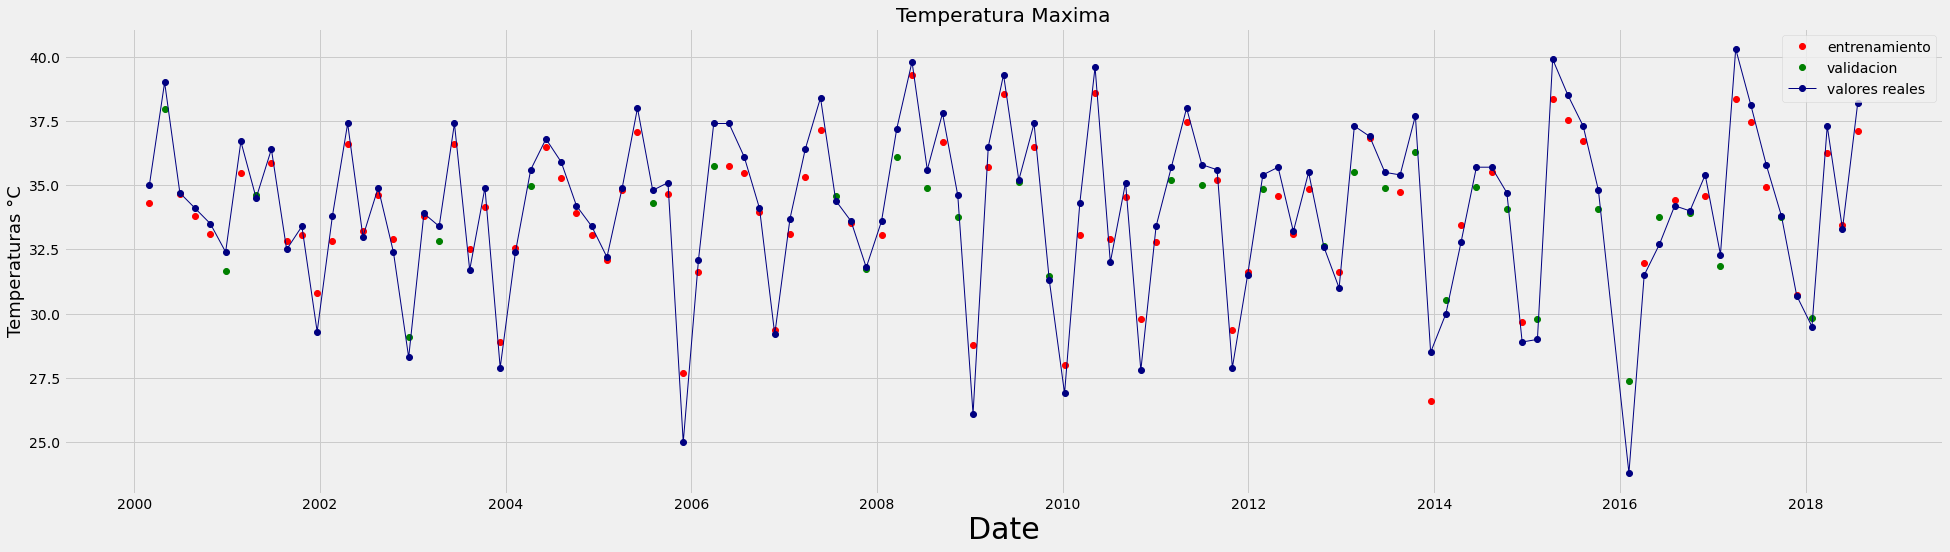

In [ ]:
plt.figure(figsize = (30,8))
plt.title("Temperatura Maxima")
plt.plot(et['PRED'],'o', color = 'red')
plt.plot(vail['PRED'],'o', color = 'green')
plt.plot(pr['TEMPMAX'],'-o',color='navy',linewidth=1)
plt.xlabel('Date', fontsize = 30)
plt.ylabel('Temperaturas °C', fontsize = 18)
plt.legend(['entrenamiento', 'validacion', 'valores reales'])
plt.show()